# Laboratorio 3 - Regresion logistica

In [78]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from datetime import datetime


In [83]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [136]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

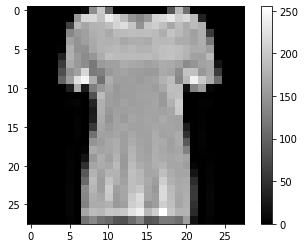

In [6]:
plt.imshow(train_images[10], cmap = 'gray')
plt.colorbar()

## Labels
  

In [19]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

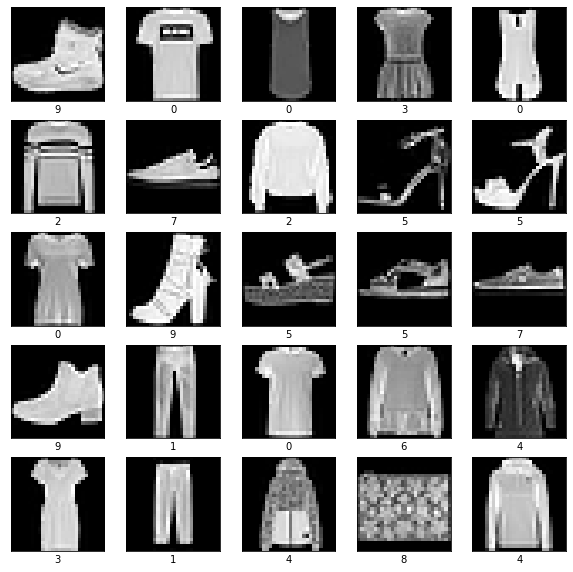

In [8]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

## Clases a Usar

In [20]:
dic = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover"}

In [26]:
train_labels_filtered =  train_labels[train_labels < 3]
train_images_filtered =  train_images[train_labels < 3 ]

In [29]:
train_reshaped = train_images_filtered.reshape(18000, 28*28)

In [32]:
with tf.Session() as session:
    y_real_train = session.run(tf.one_hot(train_labels_filtered,3))

In [61]:
class logistic_regression:

  def acurracy(self, y_pred):
    return tf.reduce_mean(tf.cast(y_pred, tf.float32))

  def softmax(self, x, W, b):
    return tf.nn.softmax(tf.matmul(x, W) + b, name="softmax")

  def prediction(self, y_hat, y):
    return tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))

  def cross_entropy(self, y_true, y_hat):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_hat))

In [118]:
tf.reset_default_graph()
g = tf.Graph()
model = logistic_regression()
with g.as_default():
    x = tf.placeholder(tf.float32, [None, 28*28]) 
    y = tf.placeholder(tf.float32, [None, 3]) 
    learning_rate = tf.placeholder("float")
    W = tf.Variable(tf.random_normal((784,3)), name = "W", dtype="float") 
    b = tf.Variable(tf.random_normal((1,3)), name = "b", dtype="float") 

    with tf.name_scope("Logistic_Regression"):
        y_hat = model.softmax(x, W, b)
    with tf.name_scope("Cost_Function"):
        cross_entropy = model.cross_entropy(y, y_hat)
        cross_summary = tf.summary.scalar('Cost_summary', cross_entropy)
        train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy) 
    with tf.name_scope("Accuracy"):
        prediction = model.prediction(y_hat, y)
        accuracy = model.acurracy(prediction)
        accuracy_summary = tf.summary.scalar('Accuracy_summary', accuracy)
    summaries = tf.summary.merge_all()
    init = tf.global_variables_initializer()

<img src="https://github.com/normanaspx/Data-Science/blob/master/resources/softmax/graph.PNG?raw=true" />

In [121]:
def training(lr,batch_size,epochs,x_values):
    tf.reset_default_graph()
    number_batches = int(len(y_real_train)/batch_size)
    now = datetime.now()
    with tf.Session(graph=g) as sess: 

        writer = tf.summary.FileWriter('j/'+str(now)+" lr="+str(lr), sess.graph)
        sess.run(init) 
        for epoch in range(epochs): 
            for batch in range(number_batches):
                init_value = batch*(batch_size)
                X = x_values[init_value:init_value+batch_size-1]
                Y = y_real_train[init_value:init_value+batch_size-1]
                sess.run(train_step, feed_dict = {x : X, y : Y,learning_rate:lr}) 
                co,beta_0,beta_1,acc,summ= sess.run([cross_entropy,W,b,accuracy,summaries],feed_dict = {x : X, y : Y,learning_rate:lr}) 
                writer.add_summary(summ, epoch+1)
                        
        writer.close()
    return (beta_0, beta_1)


# Experimentos

## Con normalizacion [0, 255] to [0, 1]  vs Sin normalizacion

In [95]:
#Norm
training(0.0001,32,400,train_reshaped/255)
#SN
training(0.0001,32,400,train_reshaped)

(array([[ 0.1429195 , -0.28060737,  1.6834657 ],
        [ 0.36119342,  0.614173  , -0.0033627 ],
        [-0.65071815, -0.09371825,  0.6914545 ],
        ...,
        [ 1.7660742 , -1.01567   ,  0.1785215 ],
        [-0.68669915,  1.994621  ,  0.6011763 ],
        [ 0.8353548 , -0.5271713 , -1.276608  ]], dtype=float32),
 array([[ 1.1163481, -1.2842398,  0.2102158]], dtype=float32))

### Acurracy

<img src="https://github.com/normanaspx/Data-Science/blob/master/resources/softmax/400.PNG?raw=true" />

### Cost function

<img src="https://github.com/normanaspx/Data-Science/blob/master/resources/softmax/400sin.PNG?raw=true" />

In [142]:
#Norm
m_w, m_b = training(0.0001,64,400,train_reshaped/255)
#SN
#training(0.0001,64,400,train_reshaped)

### Acurracy

<img src="https://github.com/normanaspx/Data-Science/blob/master/resources/softmax/exp2.PNG?raw=true" />

### Cost function

<img src="https://github.com/normanaspx/Data-Science/blob/master/resources/softmax/exp2sin.PNG?raw=true" />

In [122]:
#Norm
training(0.0001,64,10,train_reshaped/255)
#SN
training(0.0001,64,10,train_reshaped)

(array([[-0.41499418, -0.3849983 ,  0.5291832 ],
        [ 0.4878122 , -0.11307962, -0.39621526],
        [ 0.5582813 ,  1.5454012 ,  0.6988282 ],
        ...,
        [ 0.5108555 , -1.0424184 , -1.5457306 ],
        [ 1.9155302 , -1.5979437 , -0.06484796],
        [-0.7187388 , -1.6133949 , -0.54587764]], dtype=float32),
 array([[ 0.10740481, -0.19185883, -1.1883944 ]], dtype=float32))

### Acurracy

<img src="https://github.com/normanaspx/Data-Science/blob/master/resources/softmax/500.PNG?raw=true" />

### Cost function

<img src="https://github.com/normanaspx/Data-Science/blob/master/resources/softmax/500sin.PNG?raw=true" />

In [124]:
#%load_ext tensorboard
#%tensorboard --logdir j

## Predicciones

In [202]:
import random

def hyp(x, W, b):
  logistic_reg = (np.matmul(x,W)+b)
  return np.exp(logistic_reg - np.max(logistic_reg)) / np.sum(np.exp(logistic_reg - np.max(logistic_reg))) # softmax

def randomize():
  random.seed(123)
  return np.random.randint(low = 0, high = 3000, size = 5)

def plotPred(y_pred, y_true,  numplot, img):
    plt.subplot(3,2,numplot+1)
    plt.imshow(img, cmap='gray')
    plt.xlabel("Prediccion: "+y_pred+" - Valor Real: "+y_true)

def classifier(images,labels, dic):
    index = randomize()
    plt.figure(figsize=(20,20))
    for i in range(len(index)):
        image = images[index[i]]
        label = labels[index[i]]
        x = image.reshape(1,28*28)
        #Scores
        scores = hyp(x, m_w, m_b)
        label_pred = np.argmax(scores)
        plotPred(str(dic[label_pred]), str(dic[label]), i, image)


In [162]:
test_labels_filtered =  test_labels[test_labels < 3]
test_images_filtered =  test_images[test_labels < 3 ]

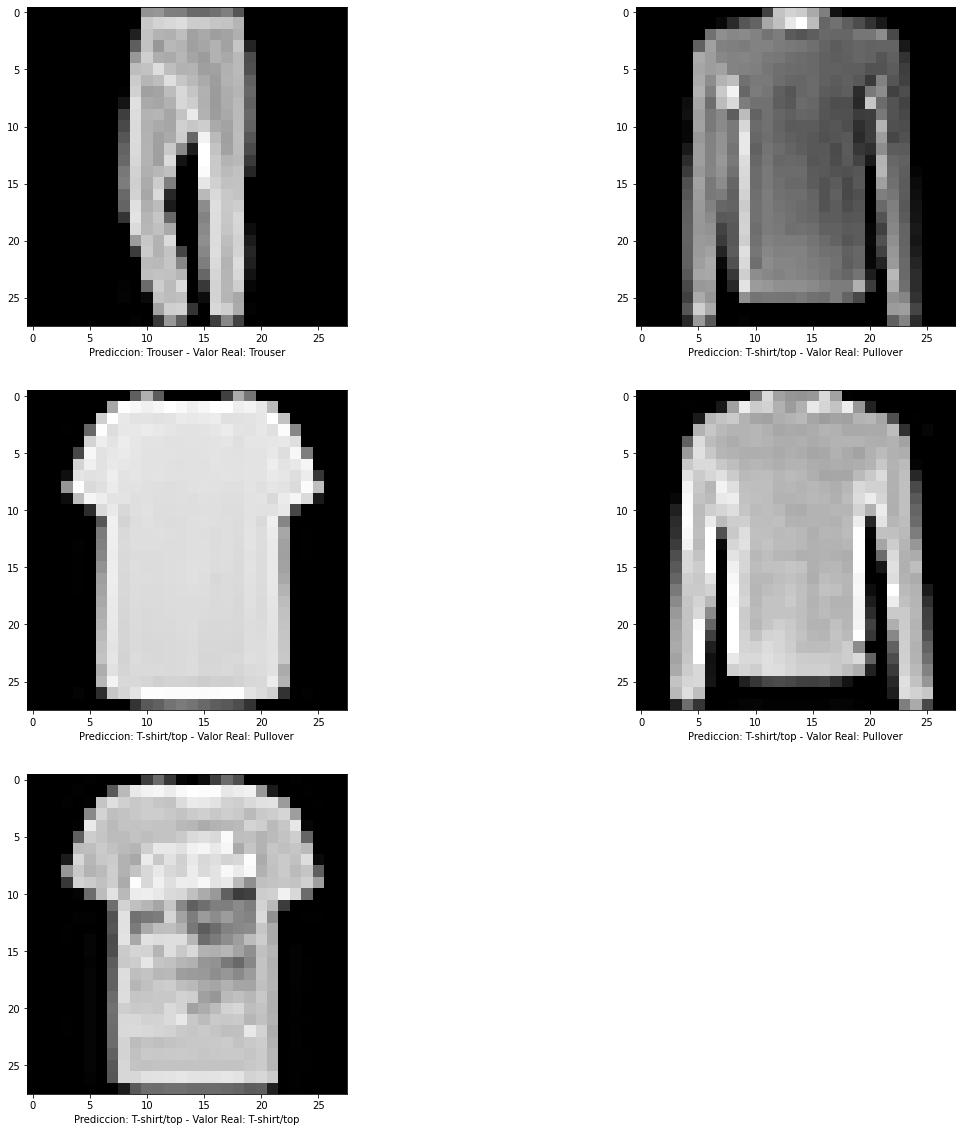

In [203]:
classifier(test_images_filtered/255,test_labels_filtered, dic)

## Conclusiones

Con un lr=0.001 y 500 epochs. Se usaron tres clases(Tshirt, Trouser, Pullover) Al modelo le cuesta diferenciar entre Pullover y Tshirt.